In [1]:
import pandas as pd
import os
import inspect


# Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
script_directory = os.path.dirname(os.path.abspath(
inspect.getfile(inspect.currentframe())))

print(script_directory)
print("File location using os.getcwd():", os.getcwd())

C:\Users\ambreen.hanif\AppData\Local\Temp\ipykernel_21864
File location using os.getcwd(): c:\Users\ambreen.hanif\Github\slr_project\experiments\churn


In [3]:
def rename_files(file):
    file = file.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").replace(":", "_").replace(",", "_")
    return file.lower()

In [4]:
# print(os.chdir())
# os.chdir
path = '../../data/churn_examples/'
files = os.listdir(path)
print(files)


for index, file in enumerate(files):
    new_name = rename_files(file)
    print(new_name)
    os.rename(os.path.join(path, file), os.path.join(path, new_name))

['bank_customer_churn_prediction.csv', 'e_commerce_dataset.xlsx', 'telecom_customer_churn.csv', 'telecom_data_dictionary.csv', 'telecom_zipcode_population.csv']
bank_customer_churn_prediction.csv
e_commerce_dataset.xlsx
telecom_customer_churn.csv
telecom_data_dictionary.csv
telecom_zipcode_population.csv


In [5]:
bank_data = pd.read_csv('../../data/churn_examples/bank_customer_churn_prediction.csv')

In [6]:
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
le = LabelEncoder()

bank_data['country']   = le.fit_transform(bank_data['country'])
bank_data['gender'] = le.fit_transform(bank_data['gender'])
bank_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = bank_data.drop('churn', axis=1)
y = bank_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
import pycaret
pycaret.__version__

'3.1.0'

In [12]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(bank_data, target = 'churn', session_id = 123)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [15]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [16]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [17]:
# init setup on exp
exp.setup(bank_data, target = 'churn', session_id = 123)

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [13]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8584,0.8542,0.4664,0.7455,0.5730,0.4935,0.5135,2.3320
gbc,Gradient Boosting Classifier,0.8580,0.8576,0.4383,0.7688,0.5572,0.4800,0.5076,0.3900
lightgbm,Light Gradient Boosting Machine,0.8546,0.8466,0.4713,0.7193,0.5691,0.4861,0.5021,0.1980
rf,Random Forest Classifier,0.8530,0.8403,0.4201,0.7495,0.5380,0.4587,0.4862,0.3520
ada,Ada Boost Classifier,0.8524,0.8394,0.4517,0.7226,0.5546,0.4719,0.4913,0.1310
et,Extra Trees Classifier,0.8523,0.8395,0.4089,0.7556,0.5299,0.4514,0.4817,0.2410
xgboost,Extreme Gradient Boosting,0.8497,0.8273,0.4692,0.6957,0.5599,0.4734,0.4871,0.0870
qda,Quadratic Discriminant Analysis,0.8324,0.8119,0.2952,0.7196,0.4179,0.3393,0.3859,0.0160
lda,Linear Discriminant Analysis,0.8066,0.7620,0.2020,0.5777,0.2979,0.2148,0.2557,0.0120
ridge,Ridge Classifier,0.8019,0.0000,0.0982,0.5878,0.1670,0.1155,0.1771,0.0170


In [18]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


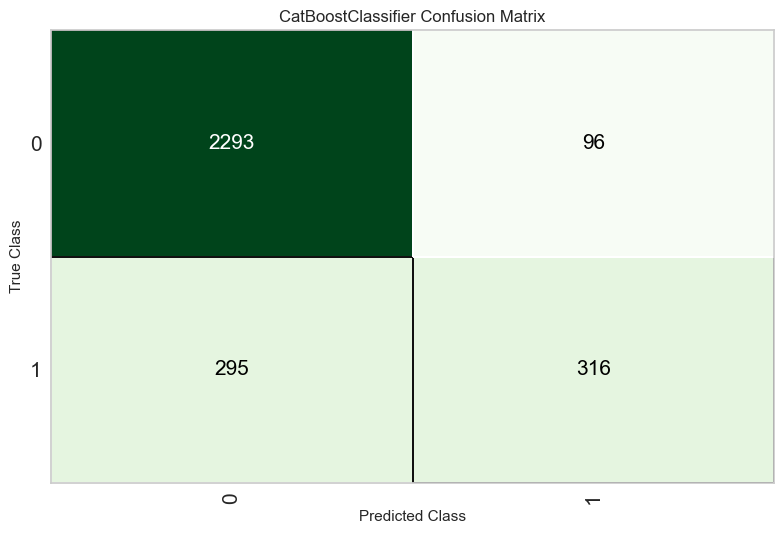

In [19]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [25]:
display(best)

: 

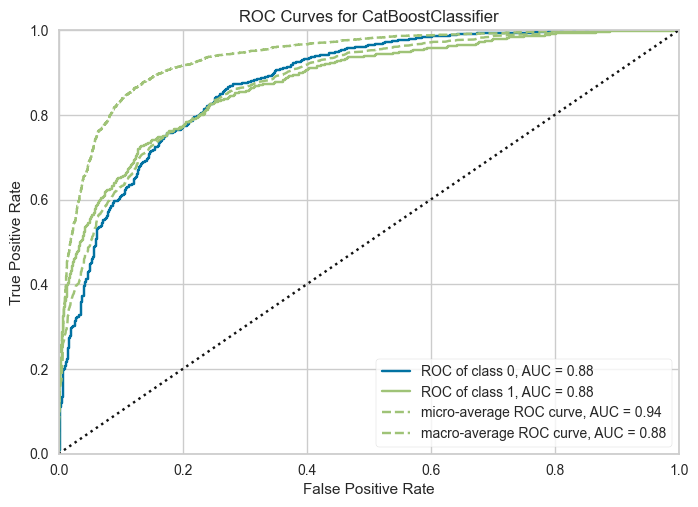

In [20]:
# plot confusion matrix
plot_model(best, plot = 'auc')

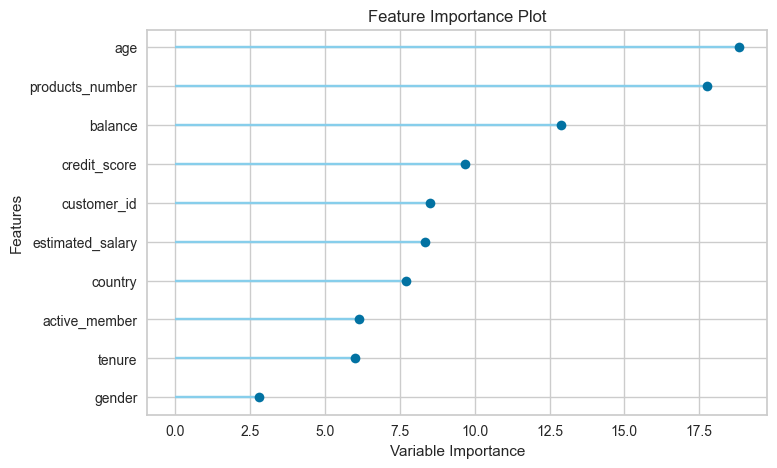

In [21]:
# plot feature importance
plot_model(best, plot = 'feature')

In [22]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [23]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['customer_id', 'credit_score',
                                              'country', 'gender', 'age',
                                              'tenure', 'balance',
                                              'products_number', 'credit_card',
                                              'active_member',
                                              'estimated_salary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               miss...
                                           

In [24]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\AMBREE~1.HAN\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['customer_id', 'credit_score',
                                             'country', 'gender', 'age',
                                             'tenure', 'balance',
                                             'products_number', 'credit_card',
                                             'active_member',
                                             'estimated_salary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True...
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x000002617ACFCCD0>)],
         verbose=False)